In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy



In [2]:
# Defining path
path = r'/Users/CK/Downloads/CF/Instacart Basket Analysis'

In [3]:
# Importing ords_prods_merge
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'customer_and_order.pkl'))

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spender_type', 'order_frequency',
       'frequency_flag', 'first_name', 'surname', 'Gender', 'State', 'Age',
       'date_joined', 'dependants', 'family_status', 'income', '_merge'],
      dtype='object')

# Q2 Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

## Barchart

<Axes: xlabel='orders_day_of_week'>

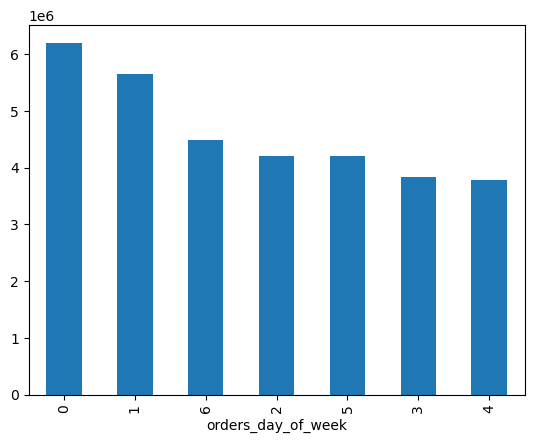

In [5]:
# creating bar chart
df['orders_day_of_week'].value_counts().plot.bar()

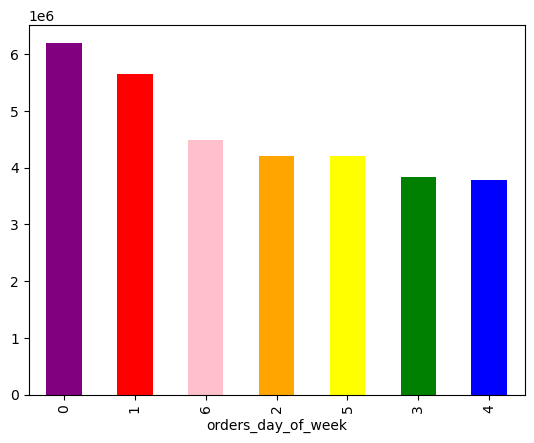

In [6]:
# adding colors to the bar
bar = df['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histogram

<Axes: ylabel='Frequency'>

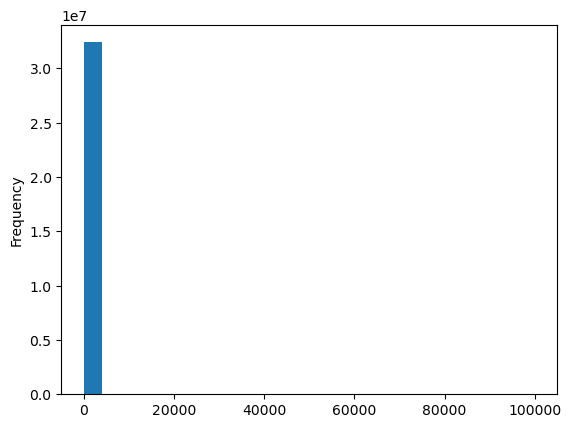

In [8]:
## Creating histogram
df['prices'].plot.hist(bins = 25)

In [9]:
## Determining outliers
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,2020-03-04,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,2020-03-04,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,2018-11-11,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,2019-10-06,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,2019-08-23,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,NaN,Gould,Male,Rhode Island,58,2019-01-25,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,2018-08-04,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,2019-05-08,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,2017-01-18,2,married,398880,both


In [10]:
df.loc[df['prices'] >100, 'prices'] = np.nan

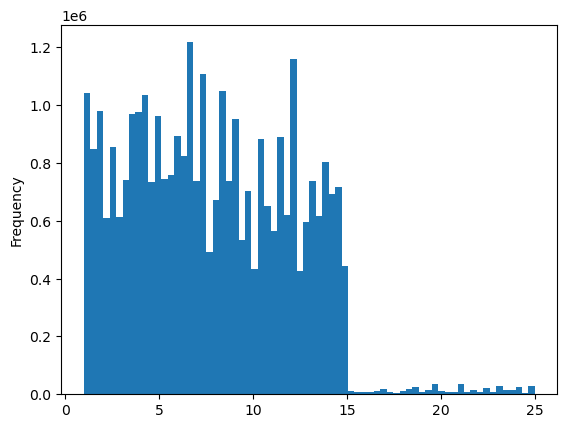

In [11]:
# viewing histogram
hist = df['prices'].plot.hist(bins=70)

Most products are between $1 and $15, while a few are higher priced at $15 to $25

In [12]:
# Exportig histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

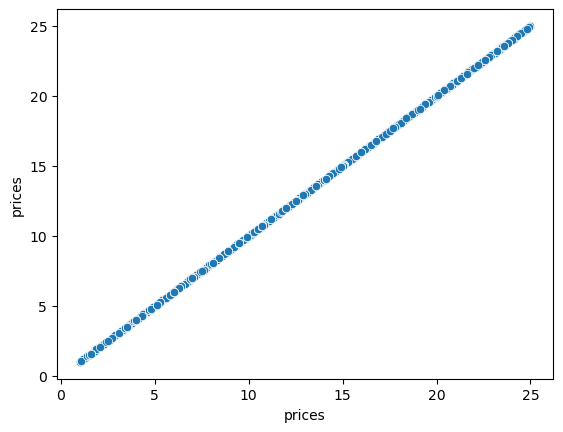

In [13]:
# creating scatterplot after replacing outliers as missing values
sns.scatterplot(x = 'prices', y = 'prices',data = df)

## Line Chart

In [14]:
# subset df with random sample 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7


In [16]:
big = df[dev]

In [17]:
small= df[~dev]

In [18]:
len(big)+len(small)

32404859

In [19]:
len(df)

32404859

In [20]:
df_2=small[['orders_day_of_week', 'prices']]

/Users/CK/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/CK/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


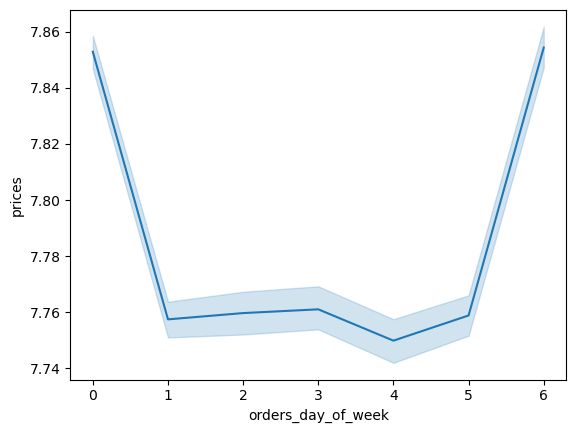

In [21]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [22]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow.png'))


# Q3 Histogram

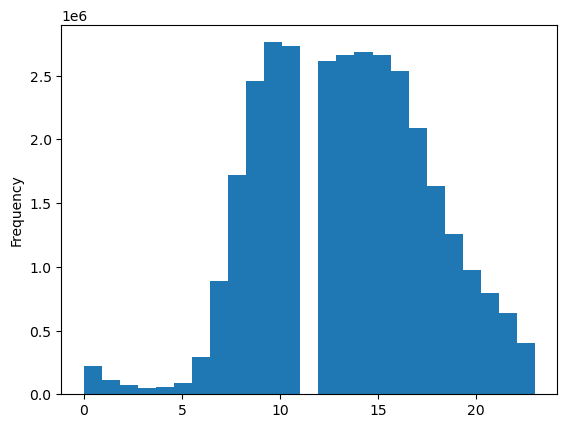

In [23]:
# #Create a histogram of the hour_of_day_ordered column
hist_hour_of_day_ordered = df['order_hour_of_day'].plot.hist(bins = 25)


In [24]:
# exporting histogram
hist_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day_ordered.png'))

There are higher orders between 10 and 15 hours. Orders decline after 5pm. Also, orders are least between midnight and 5 am.

# Q4 Barchart

In [25]:
df_loyalty=df.groupby('loyalty_flag')['order_id'].nunique()


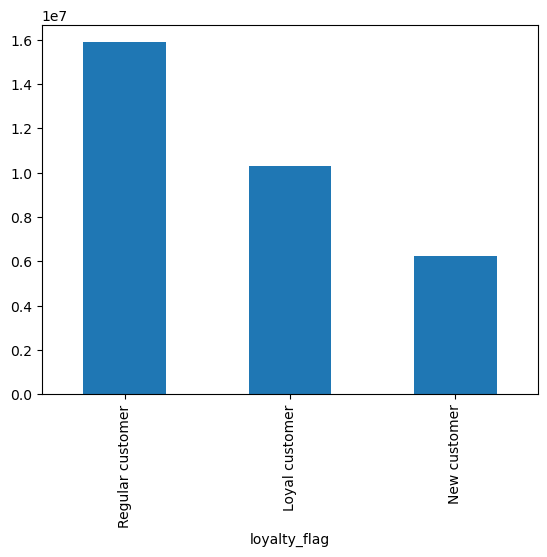

In [26]:
bar_loyalty_flag = df['loyalty_flag'].value_counts().plot.bar()

# Q5) Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [27]:
# using big small dataframe subsets created,
df_3=small[['order_hour_of_day', 'prices']]

In [ ]:
# creating line chart
line_hour_of_day_ordered=sns.lineplot(data=df_3, x='order_hour_of_day', y='prices')

/Users/CK/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/CK/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
# Exporting the line chart
line_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day_ordered.png'))

Interestingly, the high priced items are bought at midnight. Perhaps the prices are higher for late night cravings. Other hours of thedays, the prices are almost in the average range.

# Q6) Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [ ]:
# using the subset for next analysis
df_4=small[['dependants', 'Age']]

In [ ]:
line_number_of_dependants=sns.lineplot(data=df_4, x='Age', y='dependants')

The line chart does not show any correlation between age and number of dependants.

# Q7 Connection between age and spending power (income)

In [ ]:
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df)

In [ ]:
## Exporting scatter plot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

The scatterplot shows that there is no relationship between age and income.

## Other visualizations for project brief

In [4]:
df.groupby('loyalty_flag')['prices'].mean()

loyalty_flag
Loyal customer      10.386336
New customer        13.294670
Regular customer    12.495717
Name: prices, dtype: float64

In [5]:
df_aov_loyalty=df.groupby('loyalty_flag')['prices'].mean()

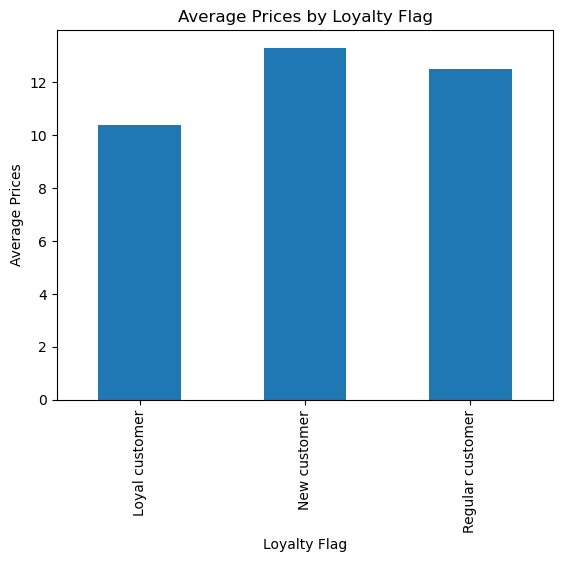

In [15]:
df_bar_loyalty= df_aov_loyalty.plot(kind='bar', x='loyalty_flag', y='prices')
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Prices')
plt.title('Average Prices by Loyalty Flag')
plt.show()

In [16]:
# Exporting the bar chart
df_bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'aov_by_loyalty.png'))

loyalty_flag
Loyal customer      7
New customer        7
Regular customer    7
Name: orders_day_of_week, dtype: int64